# 1. Random walk on random networks

In [1]:
library("igraph")
library(repr)
options(repr.plot.width=4, repr.plot.height=4)
colors = c("red", "yellow", "green", "violet", "orange", "blue", "pink", "cyan")

# Implementation of Random Walk, with teleportation
rwalk <- function(g, start, ncount) {
    node <- start
    path <- rep(NA, ncount)
    path[1] <- node
    i <- 2 

    while(i <= ncount) {
        neigh <- neighbors(g, node)
        if(length(neigh) <= 1){
            # teleport
            node <- sample.int(vcount(g), 1)
        } else {
            node <- sample(neigh, 1)
        }

        path[i] <- node
        i <- i + 1
    }
    
    path
}



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

Warning message:
“package ‘repr’ was built under R version 3.3.2”

## Part (a) :
Create undirected random networks with 1000 nodes, and
the probability p for drawing an edge between any pair of
nodes equal to 0.01.

# Part (b):

In [2]:
random_walker <- function(nv, walk_length = 60, num_walks=100) {
    g = barabasi.game(n = nv, directed = FALSE)
    cat("Network with", nv, "nodes and diameter", diameter(g))

    average_step_t = c()
    average_standard_deviation_t = c() 
    distance_matrix = shortest.paths(g, v = V(g), to = V(g))
    deg_random_walk = c()
    
    # First perform 300 walks
    W = NULL

    for(i in (1 : num_walks)){
        W = cbind(W, random_walk(g, sample.int(vcount(g), 1), walk_length))
    }
    
    for(t in 1 : walk_length) {
        distance = numeric()
        
        for(i in (1:num_walks)){
            start_vertex = W[1,i]
            tail_vertex  = W[t,i]
            
            shortest_distance = distance_matrix[start_vertex, tail_vertex]
            if (shortest_distance == Inf) {
                shortest_distance = 0
            }
            distance = c(distance, shortest_distance)
        }
        deg_random_walk = c(deg_random_walk, degree(g, v = W[t,])) 
        average_step_t = c(average_step_t, mean(distance))
        average_standard_deviation_t = c(average_standard_deviation_t, mean((distance - mean(distance))**2))    
    }
    
    return(
        list("s(t)" = average_step_t, 
             "sigma(t)" = average_standard_deviation_t, 
             "d(all)" = degree(g, mode="all"),
             "d(end)" = deg_random_walk
        )
    )
}

plot_average_path_length = function(W, vmax) {
    plot(
        1 : 60, 
        W$`s(t)`, 
        type="l", 
        xlab="Number of steps(t)", 
        ylab = "Average Path length <s(t)>",
        ylim = c(0, vmax),
        main = "Plot of average path length"
    )
}

plot_sd_path_length = function(W, vmax) {
    plot(
        1 : 60, 
        W$`sigma(t)`, 
        type="l", 
        xlab="Number of steps(t)", 
        ylab = "Standard deviation",
        ylim = c(0.0, vmax),
        main = "Plot of SD of path length"
    )
}

In [3]:
W1000 = random_walker(1000, num_walks=200)

Network with 1000 nodes and diameter 19

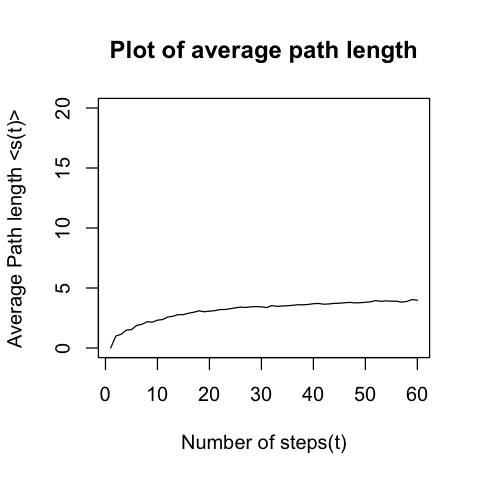

In [4]:
plot_average_path_length(W1000, 20)

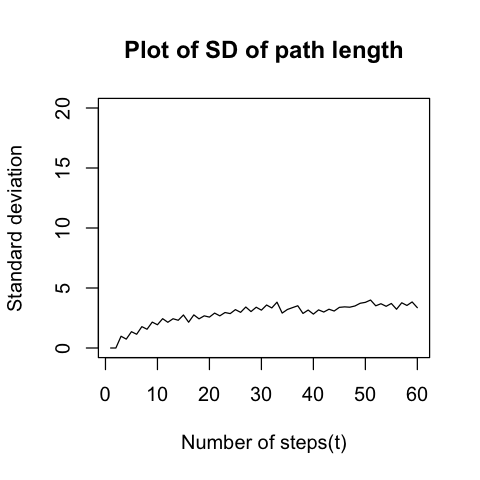

In [5]:
plot_sd_path_length(W1000, 20)

In [6]:
cat("Mean s(t) is ", mean(W1000$`s(t)`))

Mean s(t) is  3.152333

In [7]:
cat("Mean sigma(t) is ", mean(W1000$`sigma(t)`))

Mean sigma(t) is  2.823427

## Part(e)

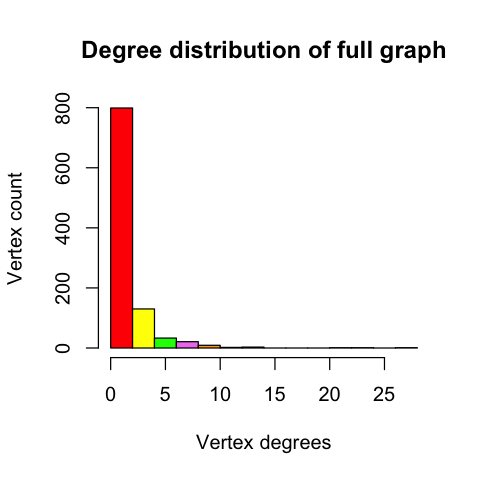

In [8]:
hist(
    W1000$`d(all)`, 
    col=colors,
    main="Degree distribution of full graph",
    xlab="Vertex degrees",
    ylab="Vertex count"
)

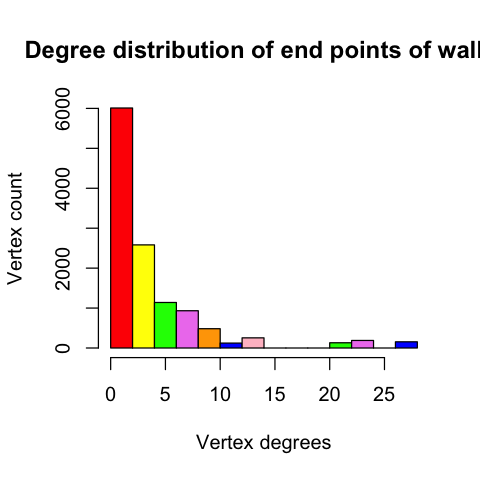

In [9]:
hist(
    W1000$`d(end)`, 
    col=colors,
    main="Degree distribution of end points of walks",
    xlab="Vertex degrees",
    ylab="Vertex count"
)

## Part(d)

In [10]:
W100 = random_walker(100)

Network with 100 nodes and diameter 12

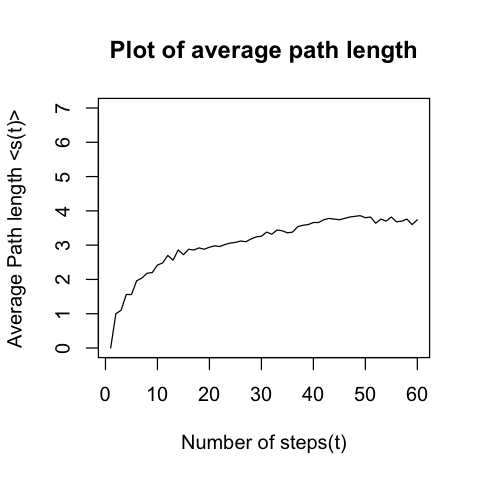

In [11]:
plot_average_path_length(W100, 7)

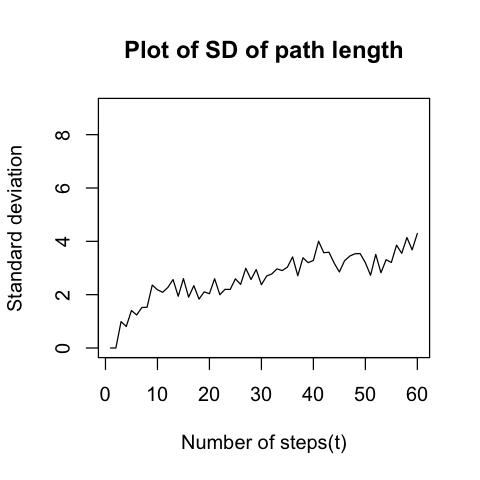

In [12]:
plot_sd_path_length(W100, 9)

In [ ]:
W = random_walker(10000, 0.01)

In [ ]:
plot_average_path_length(W, 5)

In [ ]:
plot_sd_path_length(W, 1.0)